<a href="https://colab.research.google.com/github/karthiga2001/Manthan2021/blob/main/YOLOv3_colab_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Dec 10 07:17:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    60W / 149W |   7922MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
checkpoints		  IMAGES	     README.md
Collect_training_data.py  LICENSE	     requirements.txt
deep_sort		  log		     tools
detection_custom.py	  mnist		     train.py
detection_demo.py	  model_data	     yolov3
detect_mnist.py		  object_tracker.py  YOLOv3_colab_training.ipynb
evaluate_mAP.py		  __pycache__


In [ ]:
%cd /content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3-master
!ls

/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3-master
checkpoints		  IMAGES	     README.md
Collect_training_data.py  LICENSE	     requirements.txt
deep_sort		  log		     tools
detection_custom.py	  mnist		     train.py
detection_demo.py	  model_data	     yolov3
detect_mnist.py		  object_tracker.py  YOLOv3_colab_training.ipynb
evaluate_mAP.py		  __pycache__


In [ ]:
!pip install -r ./requirements.txt

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2021-12-10 07:17:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights.8’

yolov3.weights.8    100%[===================>] 236.52M  37.0MB/s    in 8.8s    

2021-12-10 07:18:08 (26.8 MB/s) - ‘model_data/yolov3.weights.8’ saved [248007048/248007048]



In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

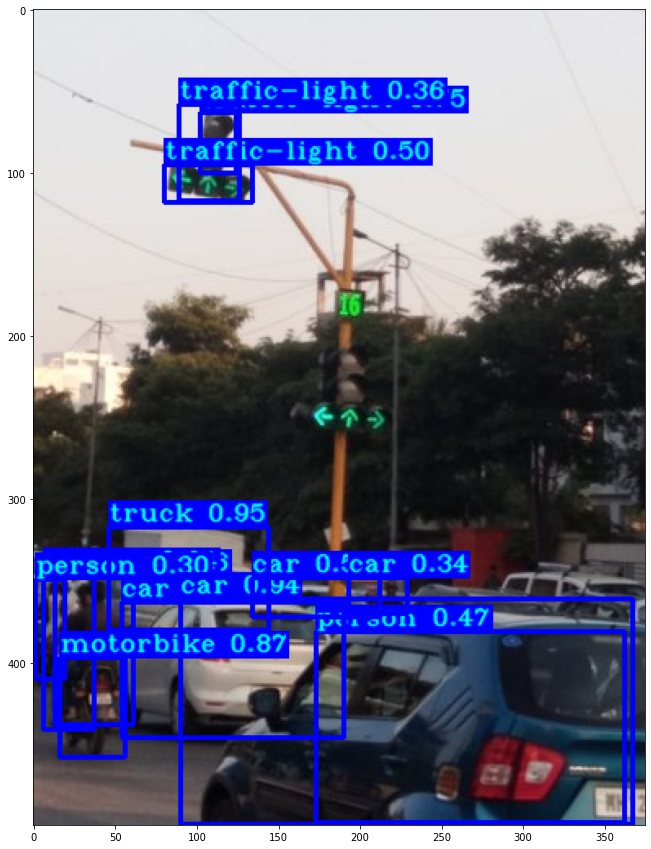

In [ ]:
image_path   = "./IMAGES/trafficsign.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)